<a href="https://colab.research.google.com/github/DarekGit/FACES_DNN/blob/master/notebooks/05_04_mmdet_DD_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### [Spis treści](https://github.com/DarekGit/FACES_DNN/blob/master/notebooks/Praca_Dyplomowa.ipynb)

[5.4 Uwagi praktyczne](Uwagi_praktyczne.ipynb)

# MMDetection Cascade_RCNN_Resnet50

Testy detekcji twarzy na zbiorze FDDB przy użyciu repozytorium mmdetection dla następujących konfiguracji:<br>
Cascade_RCNN_Resnet50

In [ ]:
!nvidia-smi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#Instalacja repozytoriow

In [ ]:
#pliki FDDB.zip,mmdet_repo.zip mmdet_results.zip mozna sciagnac z https://drive.google.com/open?id=1ApEnn3br2Z2Nt3-0Ve9DKYKMiDkFVpAR

In [ ]:
ToLoad=[
      {'name':'mmdet_repo',
        'url':'https://drive.google.com/uc?export=download&id=1PPmaz_ymOYoMSo4l7quyeqFhsu9vPUjY',
        'output': 'mmdet_repo.zip'},
      {'name':'Rusults',
        'url' : 'https://drive.google.com/uc?export=download&id=1X6nIsH5Fvm1e55JswBB2r_CpD_2EIdAI',
        'output' : 'Cascade_results.zip'
        },      
      {'name':'FDDB',
        'url' : 'https://drive.google.com/uc?export=download&id=1--Vm48Sbla2e-edQ8eYfb_gxCnuuMwPL',
        'output' : 'FDDB.zip'
        },           
      {'name':'flib',
        'url' : 'https://drive.google.com/uc?export=download&id=1jb8wyp0mMgj0COc7RpLkX4bVH7vxDbmp',
        'output' : 'flib.zip'
        },   
]

In [ ]:
%%time
!pip install gdown
import gdown
for f in ToLoad:
  gdown.download(f['url'], f['output'], False)
  file='{}'.format(f['output'])
  !unzip -o $file
  !rm $file

Downloading...
From: https://drive.google.com/uc?export=download&id=1PPmaz_ymOYoMSo4l7quyeqFhsu9vPUjY
To: /content/mmdet_repo.zip
84.5MB [00:01, 55.9MB/s]


Archive:  mmdet_repo.zip
   creating: mmdetection/build/
   creating: mmdetection/build/lib.linux-x86_64-3.6/
   creating: mmdetection/build/lib.linux-x86_64-3.6/mmdet/
   creating: mmdetection/build/lib.linux-x86_64-3.6/mmdet/ops/
   creating: mmdetection/build/lib.linux-x86_64-3.6/mmdet/ops/carafe/
  inflating: mmdetection/build/lib.linux-x86_64-3.6/mmdet/ops/carafe/carafe_cuda.cpython-36m-x86_64-linux-gnu.so  
  inflating: mmdetection/build/lib.linux-x86_64-3.6/mmdet/ops/carafe/carafe_naive_cuda.cpython-36m-x86_64-linux-gnu.so  
   creating: mmdetection/build/lib.linux-x86_64-3.6/mmdet/ops/nms/
  inflating: mmdetection/build/lib.linux-x86_64-3.6/mmdet/ops/nms/nms_cuda.cpython-36m-x86_64-linux-gnu.so  
  inflating: mmdetection/build/lib.linux-x86_64-3.6/mmdet/ops/nms/nms_cpu.cpython-36m-x86_64-linux-gnu.so  
   creating: mmdetection/build/lib.linux-x86_64-3.6/mmdet/ops/grid_sampler/
  inflating: mmdetection/build/lib.linux-x86_64-3.6/mmdet/ops/grid_sampler/grid_sampler_cuda.cpython-3

Downloading...
From: https://drive.google.com/uc?export=download&id=1X6nIsH5Fvm1e55JswBB2r_CpD_2EIdAI
To: /content/Cascade_results.zip
1.08GB [00:08, 133MB/s]


Archive:  Cascade_results.zip
   creating: work_dirs/
   creating: work_dirs/.ipynb_checkpoints/
   creating: work_dirs/cascade_rcnn_r50_FDDB_RHD/
   creating: work_dirs/cascade_rcnn_r50_FDDB_RHD/tf_logs/
  inflating: work_dirs/cascade_rcnn_r50_FDDB_RHD/tf_logs/events.out.tfevents.1585082186.c9c2735a5c31.1355.2  
  inflating: work_dirs/cascade_rcnn_r50_FDDB_RHD/results_RHD.pkl  
  inflating: work_dirs/cascade_rcnn_r50_FDDB_RHD/None.log.json  
  inflating: work_dirs/cascade_rcnn_r50_FDDB_RHD/latest.pth  
   creating: work_dirs/cascade_rcnn_r50_FDDB_BBO/
   creating: work_dirs/cascade_rcnn_r50_FDDB_BBO/tf_logs/
  inflating: work_dirs/cascade_rcnn_r50_FDDB_BBO/tf_logs/events.out.tfevents.1585076319.c9c2735a5c31.1355.0  
  inflating: work_dirs/cascade_rcnn_r50_FDDB_BBO/results_BBO.pkl  
  inflating: work_dirs/cascade_rcnn_r50_FDDB_BBO/None.log.json  
  inflating: work_dirs/cascade_rcnn_r50_FDDB_BBO/latest.pth  
  inflating: INFO.txt                
   creating: work_dirs/cascade_rcnn_r50_F

Downloading...
From: https://drive.google.com/uc?export=download&id=1--Vm48Sbla2e-edQ8eYfb_gxCnuuMwPL
To: /content/FDDB.zip
550MB [00:08, 64.3MB/s]


Streaming output truncated to the last 5000 lines.
  inflating: FDDB/2003/04/24/big/img_204.jpg  
  inflating: FDDB/2003/04/24/big/img_244.jpg  
  inflating: FDDB/2003/04/24/big/img_379.jpg  
  inflating: FDDB/2003/04/24/big/img_297.jpg  
  inflating: FDDB/2003/04/24/big/img_708.jpg  
  inflating: FDDB/2003/04/24/big/img_652.jpg  
  inflating: FDDB/2003/04/24/big/img_774.jpg  
  inflating: FDDB/2003/04/24/big/img_900.jpg  
  inflating: FDDB/2003/04/24/big/img_730.jpg  
  inflating: FDDB/2003/04/24/big/img_263.jpg  
  inflating: FDDB/2003/04/24/big/img_399.jpg  
  inflating: FDDB/2003/04/24/big/img_729.jpg  
  inflating: FDDB/2003/04/24/big/img_430.jpg  
  inflating: FDDB/2003/04/24/big/img_911.jpg  
  inflating: FDDB/2003/04/24/big/img_737.jpg  
  inflating: FDDB/2003/04/24/big/img_366.jpg  
  inflating: FDDB/2003/04/24/big/img_552.jpg  
  inflating: FDDB/2003/04/24/big/img_378.jpg  
  inflating: FDDB/2003/04/24/big/img_322.jpg  
  inflating: FDDB/2003/04/24/big/img_351.jpg  
  inflati

Downloading...
From: https://drive.google.com/uc?export=download&id=1jb8wyp0mMgj0COc7RpLkX4bVH7vxDbmp
To: /content/flib.zip
100%|██████████| 916k/916k [00:00<00:00, 101MB/s]


Archive:  flib.zip
  inflating: FDDB/flib/retina_101_32_FDDB.py  
  inflating: FDDB/flib/FDDB_statics.json  
  inflating: FDDB/flib/__pycache__/__init__.cpython-36.pyc  
  inflating: FDDB/flib/__pycache__/fddb.cpython-36.pyc  
  inflating: FDDB/flib/FDDB_metrics.json  
  inflating: FDDB/flib/MTCNN_results.json  
  inflating: FDDB/flib/fddb/fddb.py  
  inflating: FDDB/flib/fddb/__pycache__/__init__.cpython-36.pyc  
  inflating: FDDB/flib/fddb/__pycache__/fddb.cpython-36.pyc  
  inflating: FDDB/flib/fddb/__init__.py  
  inflating: FDDB/flib/mmdet/logger.py  
  inflating: FDDB/flib/mmdet/xml_FDDB.py  
  inflating: FDDB/flib/mmdet/class_names.py  
  inflating: FDDB/flib/mmdet/__init__.py  
  inflating: FDDB/flib/mmdet/voc_eval.py  
  inflating: FDDB/flib/faster_rcnn_FDDB.py  
  inflating: FDDB/flib/faster_rcnn_FDDB_Soft.py  
  inflating: FDDB/flib/ssd300_FDDB.py  
CPU times: user 3.12 s, sys: 4.08 s, total: 7.21 s
Wall time: 2min


In [ ]:
def work_to_drive(): #wymaga google drive as drive
  !zip -ur Cascade_results work_dirs/ INFO*.* DEBUG*.* result*.* -x work_dirs/*/epoch*
  !cp -f Cascade_results.zip 'drive/My Drive/Cascade/Cascade_results.zip'
def flib_to_drive(): #wymaga google drive as drive
  !zip -ur flib FDDB/flib/ 
  !cp -f flib.zip 'drive/My Drive/FDDB/flib.zip'

Import metryk dla zbioru FDDB

In [ ]:
import numpy as np
def Eboxes(m,p=0.6):#n elips format (l,s,alfa,xc,yc); p obnizenie gornej krawedzi boksa

    m=np.array(m)
    B_m=np.array([ #ekstrapolowane boksy format n*([l,t,r,b])
                  [[-l*p,s],[l,-s]] #p - obnizenie gornej krawedzi boxa
                  for l,s in m[:,:2]])
    #macierz rotacji 90deg
    rot=np.array([
                  [[0,1],[-1,0]]
                  for k in m[:,2]])        
    #rotacja i przesuniecie do srodka (xc,yc) dla poszczegolnych zestawow
    for i,B in enumerate(B_m):
        B_m[i]=np.dot(B,rot[i])
        B_m[i,:,0]+=m[i,3]; B_m[i,:,1]+=m[i,4]

    eboxes=[]
    for B in B_m:
      l,t=B[0]; r,b=B[1]
      eboxes.append([l,t,r,b])

    return eboxes

In [ ]:
def ann_xml(met,dir='FDDB/Annotations/'):
  for i,m in enumerate(met):   
      pref=[
      '<annotation>',
      '    <folder>{}</folder>'.format(m['root']),
      '    <filename>{}</filename>'.format(m['file']),
      '    <size>',
      '        <width>{}</width>'.format(int(m['ori_size'][0])),
      '        <height>{}</height>'.format(int(m['ori_size'][1])),
      '        <depth>{}</depth>'.format(int(m['depth'])),
      '    </size>',
      '    <segmented>0</segmented>',]
      bxs=[]
      B = Eboxes(m['marks'],p=1)
      for b in B: #m['ebxs']:
        bx=[
      '    <object>',
      '        <name>face</name>',
      '        <pose>Unspecified</pose>',
      '        <truncated>0</truncated>',
      '        <difficult>0</difficult>',
      '        <bndbox>',
      '            <xmin>{}</xmin>'.format(int(b[0])),
      '            <ymin>{}</ymin>'.format(int(b[1])),
      '            <xmax>{}</xmax>'.format(int(b[2])),
      '            <ymax>{}</ymax>'.format(int(b[3])),
      '        </bndbox>',
      '    </object>',]
        bxs+=bx

      suf=[
      '</annotation>',]
      anno=pref+bxs+suf

      file=m['file'].rstrip('.jpg').split('/')[-1]
      if file:
        file+='.xml'
        with open(dir+file,'w') as f:
          for t in anno:
            f.write(t+'\n')
  return  '{} Annotation Files placed in {}'.format(i+1,dir)

!mkdir -p FDDB/Annotations
#ann_xml(metrics) #uzyca w przypadku braku annotation do FDDB FDDB/Annotations/*

Zestawy ann_file (train,val) - ze wzgledu na podkatalogi w FDDB - zawieraja pelna sciezke do pliku ponizej root. Wymagalo modyfikacji ladowania datasets w xml_FDDB. W wider_face uzyto dodatkowego pola folder do odtworzenia sciezki.

In [ ]:
def file_list(met,dir='FDDB/ImageSets/Main/',files=['train.txt','val.txt'],split_r=.1):
  l=len(met); d=int(l*split_r); k=len(files)
  rang=[0]
  for i in range(k):
    rang.append(l-(k-i-1)*d)

  for i,file in enumerate(files): 
    with open(dir+file,'w') as f:
      for m in met[rang[i]:rang[i+1]]:
        t=m['file']
        f.write(t+'\n')
  return '{} placed in {} '.format(files,dir)

!mkdir -p FDDB/ImageSets/Main/
#file_list(metrics) #uzyc w przypadku braku FDDB/ImageSets/Main/* 

# Instalacja MMDet 

!!!   uwaga zajmuje 10 minut, jesli bedzie robiona kompliacja

In [ ]:
import json
with open('FDDB/flib/MTCNN_results.json','r') as f:
  mt_res=json.load(f)
with open('FDDB/flib/FDDB_metrics.json', 'r') as f:
  metrics=json.load(f)
with open('FDDB/flib/FDDB_statics.json','r') as f:
  statics=json.load(f)

In [ ]:
#GPU required
%%time

import sys
import os
if not '/content/FDDB' in sys.path : sys.path.append('/content/FDDB')
from flib import fddb as F
from PIL.ImageOps import Image

import torch
import numpy
!pip install mmcv
!pip install terminaltables

if not os.path.exists('mmdetection/'):
    mmdetection_repo = 'https://github.com/open-mmlab/mmdetection'
    !git clone -q {mmdetection_repo}
    #!cd mmdetection && git reset --hard 93bed07 ## git log cd mmdetection

    !cp FDDB/flib/mmdet/__init__.py mmdetection/mmdet/datasets/
    !cp FDDB/flib/mmdet/xml_FDDB.py mmdetection/mmdet/datasets
    !cp FDDB/flib/mmdet/voc_eval.py mmdetection/tools/
    !cp FDDB/flib/mmdet/logger.py mmdetection/mmdet/core/evaluation/
    !cp FDDB/flib/mmdet/class_names.py mmdetection/mmdet/utils

    !cd mmdetection/ && pip install -q -r requirements.txt
    !cd mmdetection/ && python setup.py develop 


if not '/content/mmdetection' in os.environ.get('PYTHONPATH'):
  os.environ.update({'PYTHONPATH': os.environ.get('PYTHONPATH')+':/content/mmdetection'})
if not '/content/mmdetection' in sys.path : sys.path.append('/content/mmdetection')

     |████████████████████████████████| 61kB 3.2MB/s 
  Created wheel for mmcv: filename=mmcv-0.4.0-cp36-cp36m-linux_x86_64.whl size=170364 sha256=10e9882cc67c4af8e546783fd6919f28a0d3ef40edacfdf260adec7fbc1fc401
  Stored in directory: /root/.cache/pip/wheels/41/17/b4/8ee4db2676c0e18f70a8afda314f5d809bd014ea795915b560
Successfully built mmcv
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=7d430e879d57076ffda62ab1a19d3b132306df08ed57c020fc031eed81075971
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built terminaltables
CPU times: user 275 ms, sys: 71.3 ms, total: 347 ms
Wall time: 15.4 s


# Wykorzystanie MMDet

## Import modułów

In [ ]:
from __future__ import division
import argparse
import os

import torch
from mmcv import Config

from mmdet import __version__
from mmdet.apis import (get_root_logger, set_random_seed, # TODO: init_dist
                        train_detector)
                        
from mmdet.datasets import build_dataset
from mmdet.models import build_detector

In [ ]:
import cv2
def result_plot(m,cfg=None,figsize=(14,14),marks=True):
    det=True if 'dbxs' in m.keys() else False
    if not det:
      img = cv2.cvtColor(cv2.imread(m['path']), cv2.COLOR_BGR2RGB)
      F.plot_marks(img,m,cfg=cfg,figsize=figsize)
    else: 
      if not cfg: cfg={'cells': {'FDDB/marks':'Marks','FDDB/ebxs': 'Extrapolated Boxes', 'dbxs': 'Detected'},
                      'colors': [ ('green',1),('white', 1), ('red', 2), ('blue', 1)],
                      'ellips': ['e','ab','rb'],
                      'figsize': (14, 14),
                      'title': 'True'}
      if not marks: cfg['ellips']=[]
      img = cv2.cvtColor(cv2.imread(m['FDDB']['path']), cv2.COLOR_BGR2RGB)
      F.plot_marks(img,m,det=True,cfg=cfg,figsize=figsize)

In [ ]:
from mmdet.apis import init_detector, inference_detector, show_result
import mmcv,cv2
from google.colab.patches import cv2_imshow
def cv2_im(atr='',img=None):
  cv2_imshow(img)
cv2.imshow=cv2_im

def show_video(file='IMG.mp4',config_file = 'FDDB/flib_F/ssd300_FDDB.py',checkpoint_file = 'work_dirs/ssd300_FDDB/latest.pth'):
  model = init_detector(config_file, checkpoint_file, device='cuda:0')
  model.CLASSES=('face',)

  video = mmcv.VideoReader(file)
  for i,frame in enumerate(video):
      if not i%20:
        result = inference_detector(model, frame)
        show_result(frame, result, model.CLASSES, wait_time=1)
        cv2.destroyAllWindows()

#cascade_rcnn_r50_FDDB

In [ ]:
test=[{'desc':'trenowanie tylko BBoxHead', 'head':'xHead',
       'suf':'_BBO'},
      {'desc':'trenowanie tylko RPNHead', 'head':'NHead',
       'suf':'_RHD'}, 
      {'desc':'trenowanie all Head', 'head':'Head',
       'suf':'_AHD'},  
      ]

In [ ]:
Id=2
test[Id]['desc']

'trenowanie all Head'

In [ ]:
cfg = Config.fromfile('FDDB/flib/cascade_rcnn_r50_FDDB.py') # <-- późniejsze zadanie

# ustawienie cudnn_benchmark
if cfg.get('cudnn_benchmark', False):
    torch.backends.cudnn.benchmark = True # https://discuss.pytorch.org/t/what-does-torch-backends-cudnn-benchmark-do/5936
cfg.work_dir+=test[Id]['suf']

In [ ]:
# inicjalizacja loggera
distributed = False # niestety w Colabie nie będzie distributed
logger = get_root_logger(cfg.log_level)
logger.info('Distributed training: {}'.format(distributed))

2020-03-25 14:24:00,809 - mmdet - INFO - Distributed training: False


In [ ]:
model = build_detector(
        cfg.model, train_cfg=cfg.train_cfg, test_cfg=cfg.test_cfg)

2020-03-25 14:24:07,056 - mmdet - INFO - load model from: torchvision://resnet50
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


2020-03-25 14:24:07,855 - mmdet - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias



In [ ]:
model.load_state_dict(torch.load('work_dirs/cascade_rcnn_r50_FDDB_AHD/latest.pth')['state_dict'],False)

<All keys matched successfully>

In [ ]:
desc=test[Id]['head'] 
m = model.modules()
def heads(m,desc):
  for p in next(m).children():
    if p._get_name() == 'ModuleList': heads(p.modules(),desc)
    else: 
      if desc in p._get_name():        
        print(p._get_name()," True    <<<<<<<<<<<<<")
        p.requires_grad_(True)
      else: 
        p.requires_grad_(False)
        print(p._get_name()," False")
heads(m,desc)

ResNet  False
FPN  False
RPNHead  True    <<<<<<<<<<<<<
SingleRoIExtractor  False
SingleRoIExtractor  False
SingleRoIExtractor  False
SharedFCBBoxHead  True    <<<<<<<<<<<<<
SharedFCBBoxHead  True    <<<<<<<<<<<<<
SharedFCBBoxHead  True    <<<<<<<<<<<<<


In [ ]:
datasets = [build_dataset(cfg.data.train)]
#datasets.append(build_dataset(cfg.data.test)) # niestety niedostępna walidacja w trybie non-distributed  

In [ ]:
train_detector(
    model,
    datasets,
    cfg,
    distributed=False,
    validate=False)
#work_to_drive()

2020-03-24 21:51:00,030 - mmdet - INFO - Start running, host: root@c9c2735a5c31, work_dir: /content/work_dirs/cascade_rcnn_r50_FDDB_AHD
2020-03-24 21:51:00,033 - mmdet - INFO - workflow: [('train', 1)], max: 100 epochs
2020-03-24 21:51:26,087 - mmdet - INFO - Epoch [1][48/641]	lr: 0.00792, eta: 9:39:15, time: 0.543, data_time: 0.016, memory: 4115, loss_rpn_cls: 0.0222, loss_rpn_bbox: 0.0050, s0.loss_cls: 0.1133, s0.acc: 96.3949, s0.loss_bbox: 0.0806, s1.loss_cls: 0.0410, s1.acc: 97.5972, s1.loss_bbox: 0.0457, s2.loss_cls: 0.0142, s2.acc: 98.5575, s2.loss_bbox: 0.0102, loss: 0.3322
2020-03-24 21:51:51,413 - mmdet - INFO - Epoch [1][96/641]	lr: 0.00920, eta: 9:30:49, time: 0.528, data_time: 0.012, memory: 4115, loss_rpn_cls: 0.0235, loss_rpn_bbox: 0.0043, s0.loss_cls: 0.1106, s0.acc: 96.5240, s0.loss_bbox: 0.0755, s1.loss_cls: 0.0370, s1.acc: 97.7661, s1.loss_bbox: 0.0458, s2.loss_cls: 0.0130, s2.acc: 98.6338, s2.loss_bbox: 0.0113, loss: 0.3210
2020-03-24 21:52:17,508 - mmdet - INFO - Ep

In [ ]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
config_file = 'FDDB/flib/cascade_rcnn_r50_FDDB.py' # lub wcześniejsze cfg
checkpoint_file = 'work_dirs/cascade_rcnn_r50_FDDB'+test[Id]['suf']+'/latest.pth'
results = 'work_dirs/cascade_rcnn_r50_FDDB'+test[Id]['suf']+'/results'+test[Id]['suf']+'.pkl'
detection_model = init_detector(cfg, checkpoint_file, device='cuda:0')
checkpoint_file

/content/mmdetection/mmdet/apis/inference.py:40: UserWarning: Class names are not saved in the checkpoint's meta data, use FDDB classes by default.
  warnings.warn('Class names are not saved in the checkpoint\'s '


In [ ]:
checkpoint_file

In [ ]:
import numpy as np

def mmdet_res(Id,tre=0.5,cfg=None,figsize=(10,10),marks=True):
  result = inference_detector(detection_model, metrics[Id]['path'])
  xs =np.array([x for x in result[0] if x[4] >tre])
  wyn={'dbxs':xs[:,:4],
        'TP': [[0,i,x[4]] for i,x in enumerate(xs) ],
      'FDDB': mt_res[Id]['FDDB']
      }
  print('annotated: {}, detected: {}'.format(len(mt_res[Id]['FDDB']['marks']),len(xs)))
  result_plot(wyn,cfg=cfg,figsize=figsize,marks=marks)

In [ ]:
F.plot_marks

annotated: 22, detected: 64
 \Ellipses , \Rotated boxes , \Annotated boxes , Extrapolated Boxes , Detected Boxes ,

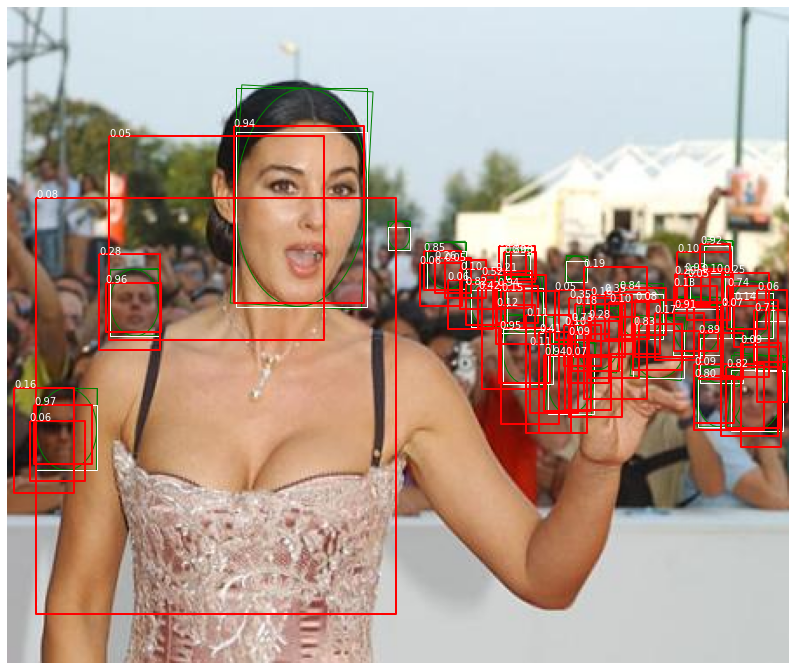

annotated: 22, detected: 21
 \Ellipses , \Rotated boxes , \Annotated boxes , Extrapolated Boxes , Detected Boxes ,

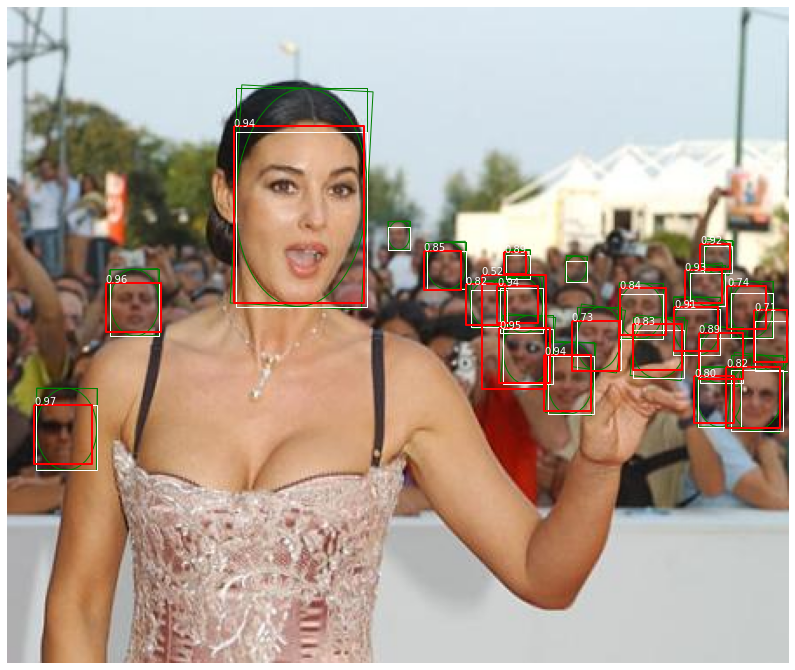

annotated: 22, detected: 20
 \Ellipses , \Rotated boxes , \Annotated boxes , Extrapolated Boxes , Detected Boxes ,

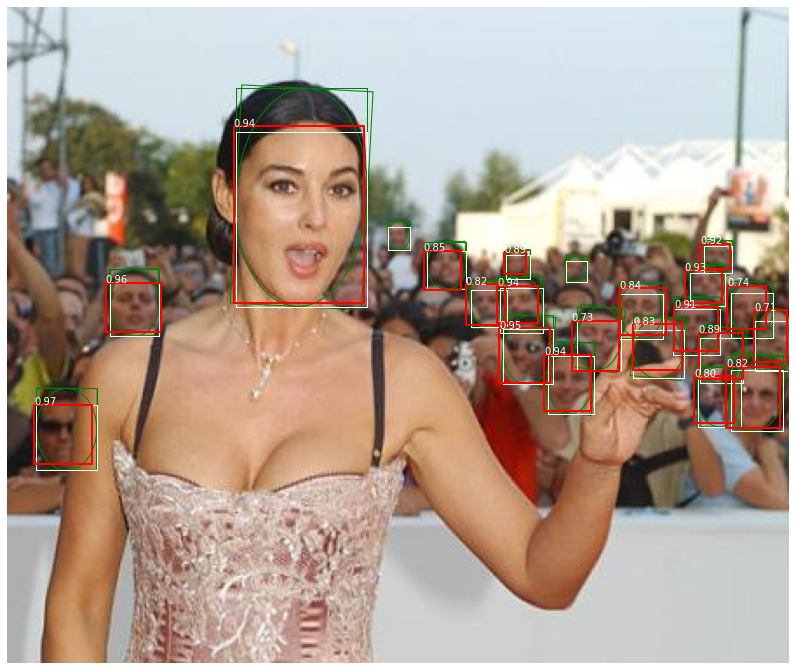

In [ ]:
i=2548
for tre in [0,0.5,0.7]:
  mmdet_res(i,tre=tre)


In [ ]:
!python mmdetection/tools/test.py  $config_file $checkpoint_file --out $results
!python mmdetection/tools/voc_eval.py $results $config_file

[>>] 284/284, 10.2 task/s, elapsed: 28s, ETA:     0s
writing results to work_dirs/cascade_rcnn_r50_FDDB_AHD/results_AHD.pkl

+-------+-----+------+--------+-------+
| class | gts | dets | recall | ap    |
+-------+-----+------+--------+-------+
| face  | 551 | 2330 | 0.851  | 0.750 |
+-------+-----+------+--------+-------+
| mAP   |     |      |        | 0.750 |
+-------+-----+------+--------+-------+


In [ ]:
'''
100 epochs dodatkowo wszystkie Head
+-------+-----+------+--------+-------+
| class | gts | dets | recall | ap    |
+-------+-----+------+--------+-------+
| face  | 551 | 2330 | 0.851  | 0.750 |
+-------+-----+------+--------+-------+
| mAP   |     |      |        | 0.750 |
+-------+-----+------+--------+-------+

12 epochs dodatkowo RPNHead
+-------+-----+-------+--------+-------+
| class | gts | dets  | recall | ap    |
+-------+-----+-------+--------+-------+
| face  | 551 | 24557 | 0.895  | 0.580 |
+-------+-----+-------+--------+-------+
| mAP   |     |       |        | 0.580 |
+-------+-----+-------+--------+-------+

12 epochs tylko BBoxHeads
+-------+-----+------+--------+-------+
| class | gts | dets | recall | ap    |
+-------+-----+------+--------+-------+
| face  | 551 | 913  | 0.154  | 0.075 |
+-------+-----+------+--------+-------+
| mAP   |     |      |        | 0.075 |
+-------+-----+------+--------+-------+

20 epochs - wszystkie Heads
+-------+-----+------+--------+-------+
| class | gts | dets | recall | ap    |
+-------+-----+------+--------+-------+
| face  | 551 | 4762 | 0.889  | 0.782 |
+-------+-----+------+--------+-------+
| mAP   |     |      |        | 0.782 |
+-------+-----+------+--------+-------+
'''

In [ ]:
#przepisanie metryk dla obrazow
mmdet_1_res=[]
name='cascade_rcnn_r50_FDDB'
for m in metrics:
  mmdet_1_res.append({'name': name,'FDDB':m})

In [ ]:
import time as t
t0=t.time()
tre=0.5

for i,d in enumerate(mmdet_1_res):
  m=d['FDDB']

  img_path = m['path']
  result = inference_detector(detection_model, img_path)[0]
  xs =np.array([x[:4] for x in result if x[4] >tre])
  mmdet_1_res[i]['dbxs']=[list(dbx.astype('float64')) for dbx in xs] #.astype('float64') for json

print('time {} s  for {} detections'.format(t.time()-t0,i+1))

time 307.7222902774811 s  for 2845 detections


In [ ]:
work_to_drive()

### [Spis treści](https://github.com/DarekGit/FACES_DNN/blob/master/notebooks/Praca_Dyplomowa.ipynb)

[5.4 Uwagi praktyczne](Uwagi_praktyczne.ipynb)